1 Aprendizaje supervisado
==

PASO 1: Regresión Líneal
==

El método de regresión lineal consiste en identificar con precisión una línea que sea capaz de representar la distribución de puntos en un plano bidimensional. Dada la siguiente ecuación de la recta:
y=  (y_2-y_1)/(x_2-x_1 )*(x-x_1 )+y_(1 =)  (y_2-y_1)/(x_2-x_1 )*x+(y_(1 )-(y_2-y_1)/(x_2-x_1 )*x_1 )

y=α*x+β

In [1]:
import pandas as pd
import numpy as np
dat_csv  = pd.read_csv('datos4.csv', encoding = "ISO-8859-1")
datos_x = dat_csv.x
datos_y = dat_csv.y
x = []
y = []
for i in dat_csv.x:
    x.append(i)
for j in dat_csv.y:
    y.append(j)
print(x)    
print(y)

X = np.array(x)
Y = np.array(y)

[1.81, 2.58, 3.26, 4.27, 5.89, 6.42, 7.62, 8.82, 9.05, 10.66, 11.11, 12.11, 13.95, 14.97, 15.08, 16.06, 17.57, 18.45, 19.7, 20.37]
[13.16, 24.56, 37.0, 48.86, 60.63, 72.68, 84.99, 96.54, 108.85, 121.18, 133.0, 144.63, 157.07, 168.92, 180.71, 193.04, 204.39, 217.12, 228.72, 241.29]


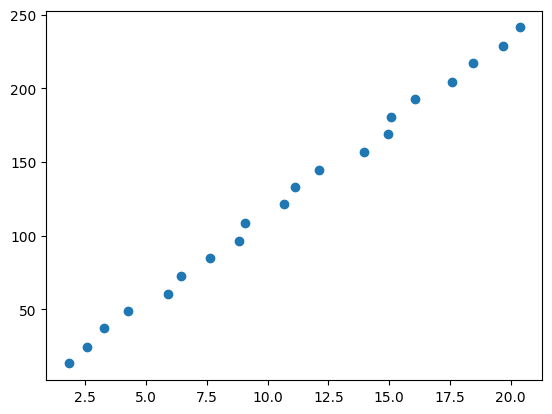

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,Y)
plt.show()

PASO 2: Creamos datos de entrenamiento
==

In [3]:
datos_entrenamiento = int(0.8 * len(X))
datos_entrenamiento
datos_prueba = len(X) - datos_entrenamiento
datos_prueba

4

In [4]:
X,Y
datos_entrenamiento = int(0.8 * len(X))
datos_prueba = len(X) - datos_entrenamiento
 
#ENTRENAMIENTO
X_entrenamiento = X[:datos_entrenamiento].reshape((datos_entrenamiento,1))
print(X_entrenamiento)
Y_entrenamiento = Y[:datos_entrenamiento].reshape((datos_entrenamiento,1))
print(Y_entrenamiento)
#PRUEBA
X_prueba = X[datos_entrenamiento:].reshape((datos_prueba,1))
Y_prueba = Y[datos_entrenamiento:].reshape((datos_prueba,1))

[[ 1.81]
 [ 2.58]
 [ 3.26]
 [ 4.27]
 [ 5.89]
 [ 6.42]
 [ 7.62]
 [ 8.82]
 [ 9.05]
 [10.66]
 [11.11]
 [12.11]
 [13.95]
 [14.97]
 [15.08]
 [16.06]]
[[ 13.16]
 [ 24.56]
 [ 37.  ]
 [ 48.86]
 [ 60.63]
 [ 72.68]
 [ 84.99]
 [ 96.54]
 [108.85]
 [121.18]
 [133.  ]
 [144.63]
 [157.07]
 [168.92]
 [180.71]
 [193.04]]


PASO 3 - Realizamos regresión lineal.
==

<function matplotlib.pyplot.show(close=None, block=None)>

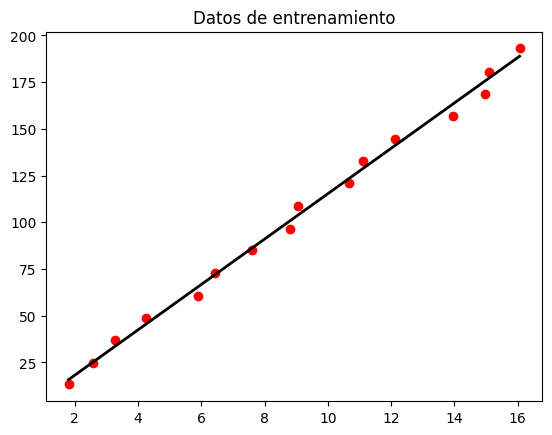

In [5]:
from sklearn import linear_model

# Creamos un objeto de regresión lineal
linear_regressor = linear_model.LinearRegression()     

# Ajustamos la regresión a los datos de entrenamiento
linear_regressor.fit(X_entrenamiento, Y_entrenamiento)

# Y a partir de datos de regresión encontrados
Y_predicha_de_entrenamiento = linear_regressor.predict(X_entrenamiento)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_entrenamiento, Y_entrenamiento, color='red')
plt.plot(X_entrenamiento, Y_predicha_de_entrenamiento, color='black', linewidth=2)
plt.title('Datos de entrenamiento')
plt.show

>Una vez que visualizamos el ajuste podemos evaluar la correspondencia de la regresión con relación a los datos de prueba.

[[204.39]
 [217.12]
 [228.72]
 [241.29]]
[[207.23551421]
 [217.9262929 ]
 [233.1120581 ]
 [241.25162825]]


<function matplotlib.pyplot.show(close=None, block=None)>

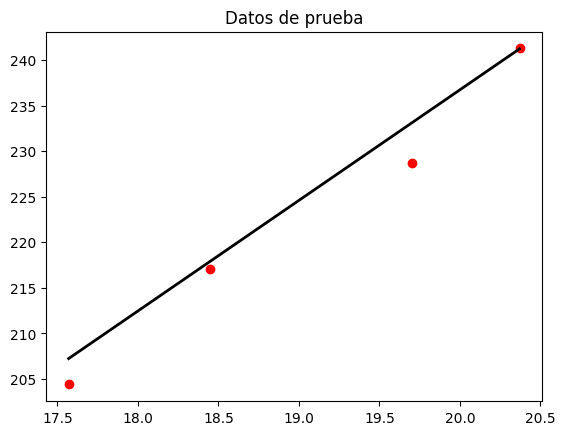

In [10]:
Y_predicha_de_prueba = linear_regressor.predict(X_prueba)
print(Y_prueba)
print(Y_predicha_de_prueba)
plt.figure()
plt.scatter(X_prueba, Y_prueba, color='red')
plt.plot(X_prueba, Y_predicha_de_prueba, color='black', linewidth=2)
plt.title('Datos de prueba')
plt.show

Existen varias formas de evaluar una regresión lineal, y podemos utilizar nuevamente scikit-learn  para realizar esta tarea, mediante el módulo metrics según se muestra a continuación:   
>•	__Error absoluto medio:__ este es el promedio de errores absolutos de todos los puntos de datos en el conjunto de datos dado.

>•	__Error cuadrático medio:__ Este es el promedio de los cuadrados de los errores de todos los puntos de datos en el conjunto de datos dado. ¡Es una de las métricas más populares que hay!

>•	__Error absoluto mediano:__ Esta es la mediana de todos los errores en el conjunto de datos dado. La principal ventaja de esta métrica es que es robusta a los valores atípicos. Un único punto negativo en el conjunto de datos de prueba no distorsionaría la métrica de error completa, en lugar de una métrica de error promedio.

>•	__Puntuación de varianza explicada:__ esta puntuación mide qué tan bien nuestro modelo puede explicar la variación en nuestro conjunto de datos. Una puntuación de 1.0 indica que nuestro modelo es perfecto.

>•	__Puntuación R2:__ Se nombra como R cuadrado, y esta puntuación se refiere al coeficiente de determinación. Esto nos dice qué tan bien serán predichas las muestras desconocidas por nuestro modelo. La mejor puntuación posible es 1.0, pero la puntuación también puede ser negativa.


In [19]:
import sklearn.metrics as sm
print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

Error absoluto medio = 2.02
Error cuadratico medio = 7.01
Error absoluto mediano = 1.83
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.96


Regresión contraída
==

Permite eliminar puntos aislados

Error absoluto medio = 1.49
Error cuadratico medio = 2.86
Error absoluto mediano = 1.49
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.98


<function matplotlib.pyplot.show(close=None, block=None)>

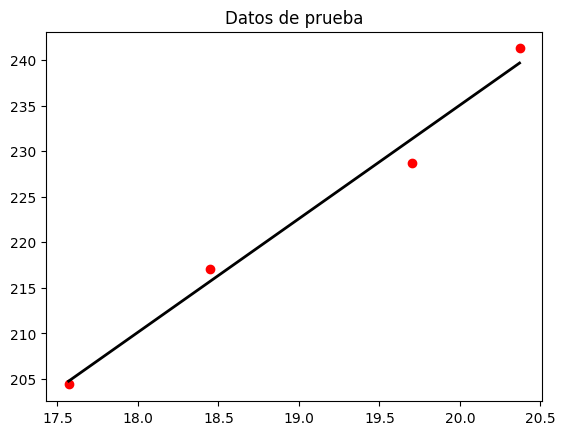

In [20]:
from sklearn import linear_model
regresion_ridge = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
regresion_ridge.fit(X_prueba, Y_prueba)

Y_predicha_de_prueba = regresion_ridge.predict(X_prueba)


print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

plt.figure()
plt.scatter(X_prueba, Y_prueba, color='red')
plt.plot(X_prueba, Y_predicha_de_prueba, color='black', linewidth=2)
plt.title('Datos de prueba')
plt.show

3.Clasificación - Regresión logística.
==
La regresión logística (Logistic Regression), a pesar de su nombre, es un modelo lineal para la clasificación en lugar de la regresión. 

Paso 1
==
Comencemos por tomar una serie de puntos según se muestra a continuación y graficarlos como hemos aprendido a hacer hasta aquí.


In [ ]:
import numpy as np
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = np.array([[16,2], [3,1], [2,7], [13,4], [3,4], [12,5], [15,6], [4,6]])
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()


Paso 2
==
Dados los puntos de dispersión parecen existir dos grupos de datos, uno que se agrupa en torno al valor x = 3 y otro que se agrupa en torno al valor x = 14, lo que haremos es en base a esta hipótesis asignar a los valores cercanos a 3 el valor de cero y a los cercanos a catorce el valor de uno y agregaremos los valores en el mismo orden dentro del array Y.


In [ ]:
Y = [1, 0, 0, 1, 0, 1, 1, 0]

Paso 3
==
Ahora utilizaremos el objeto clasificador “LogisticRegresion” y le pasaremos los datos que deseamos clasificar de forma de crear un modelo, haciendo que se ajuste mediante el uso de (fit)  


In [ ]:
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100)
clasificador.fit(X, Y)

Paso 4
==
Con la clasificación realizada, utilizaremos el método predict() de forma de predecir como el modelo predice los propios valores pasados como datos. Este es un caso muy simple en el cual la predicción retorna exactamente los mismos valores, sin embargo en otros casos más complejos el ajuste no es del 100% y el modelo debe ser ajustado a medida que conocemos más la problemática del tema tratado. 


In [ ]:
prediccion = clasificador.predict(X)
print(prediccion)

In [ ]:
print(clasificador.score(X,Y))

Paso 5
==
Ahora en base a otros datos recopilados podemos ver como el modelo predice al grupo al cual deberían pertenecer los datos.


In [ ]:
Xn = np.array([[6,4], [20,7], [4,17]])
Yn = clasificador.predict(Xn)
print(Yn)

Paso 6
==
Siempre es mejor tratar de visualizar los datos para tener una mejor comprensión del tema, por lo que vamos a graficar los datos asignando como colores las opciones de ceros o unos de la clasificación (c=Y). 


In [ ]:
Xs = np.concatenate((X, Xn), axis=0)
Ys = np.append(Y , Yn)

x_min, x_max = min(Xs[:, 0]) - 1.0, max(Xs[:, 0]) + 1.0
y_min, y_max = min(Xs[:, 1]) - 1.0, max(Xs[:, 1]) + 1.0


Dado ahora los puntos de los ejes x e y crearemos a partir de ellos una malla de puntos lo cual es en la practica una cuadricula rectangular creada a partir de los datos. 

In [ ]:
step_size = 0.01

valor_x, valor_y = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
 
malla_de_puntos = clasificador.predict(np.c_[valor_x.ravel(), valor_y.ravel()])


Aquí estamos utilizando el método ravel() de forma de crear una copia de los valores originales. También podríamos haber utilizado el método flatten(), la diferencia entre ambos son: 
>__ravel ():__ Retorna una referencia a la matriz original, si se modifica la matriz, el valor de la matriz original también cambia. ravel() es más rápido que flatten().

>__flatten ():__ Retorna una copia de la matriz original, si sei modifica algún valor de esta matriz, el valor de la matriz original no se verá afectado.  

Tambien notar que estamos utilizando np.c_, para obtener los datos por pares x, y ya que dada una matriz  nos retorna sus valores por columnas. 


Paso 7 
==
Creamos un mapa de color a partir de los datos anteriores mediante pcolormesh() :


In [ ]:
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)
plt.figure()
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap=plt.cm.gray, shading='auto')


Paso 8
==
Finalmente podemos poner sobre un gráfico todos los puntos tanto los de entrenamiento como los de testeo y comprobar que el modelo a separado correctamente los valores:


In [ ]:
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)
plt.figure()
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap=plt.cm.gray, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=Y, s=80, edgecolors='red', linewidth=1, cmap=plt.cm.Paired)
plt.scatter(Xn[:, 0], Xn[:, 1], c=clasificador.predict(Xn), s=180, edgecolors='blue', linewidth=2, cmap=plt.cm.Paired)
 
plt.show()


EJEMPLO RESHAPE()
==

In [ ]:
x = np.array([1, 5, 10])
y = np.array([1, 4, 8])
z = np.linspace(0, 255, 9).reshape(3, 3)
print(z)
plt.pcolormesh(x, y, z, cmap = "PuRd", shading ='auto'); #cmap = "PuRd");
plt.colorbar();